This notebook shows a few features of the NodePy package.

## Instantiating a method and inspecting its properties

We can load a pre-defined RK method:

In [ ]:
from nodepy import rk
import numpy as np

rk4 = rk.loadRKM('RK44')

Or create a custom method by entering the coefficients:

In [2]:
A=np.array([[0,0],[0.5,0]])
b=np.array([0,1.])
rk22=rk.ExplicitRungeKuttaMethod(A,b)

We can print the Butcher tableau:

In [3]:
print(rk4)

Classical RK4
The original four-stage, fourth-order method of Kutta
 0   |
 1/2 | 1/2
 1/2 |      1/2
 1   |           1
_____|____________________
     | 1/6  1/3  1/3  1/6


In [4]:
print(rk22)

Runge-Kutta Method

 0.000 |
 0.500 | 0.500
_______|______________
       | 0.000  1.000


Plot the region of absolute stability:

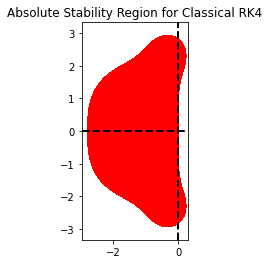

In [5]:
rk4.plot_stability_region();

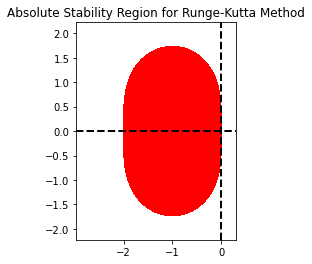

In [6]:
rk22.plot_stability_region();

Check the order of the method:

In [7]:
print(rk4.order())
print(rk22.order())

4
2


## Understanding Runge-Kutta order conditions

Order conditions for Runge-Kutta methods are algebraic conditions on the coefficients that are necessary and sufficient in order that the local error have a certain order (in terms of the time step size).  In the theory developed by John Butcher and subsequent researchers, it has been shown that the conditions for order $p$ can be mapped 1-1 to the set of rooted trees of order $p$.  This correspondence is used in NodePy to generate order conditions.  As an illustration, here are all the rooted trees of order 6.

For more on the theory of RK order conditions, see the textbook of Butcher or of Hairer & Wanner.

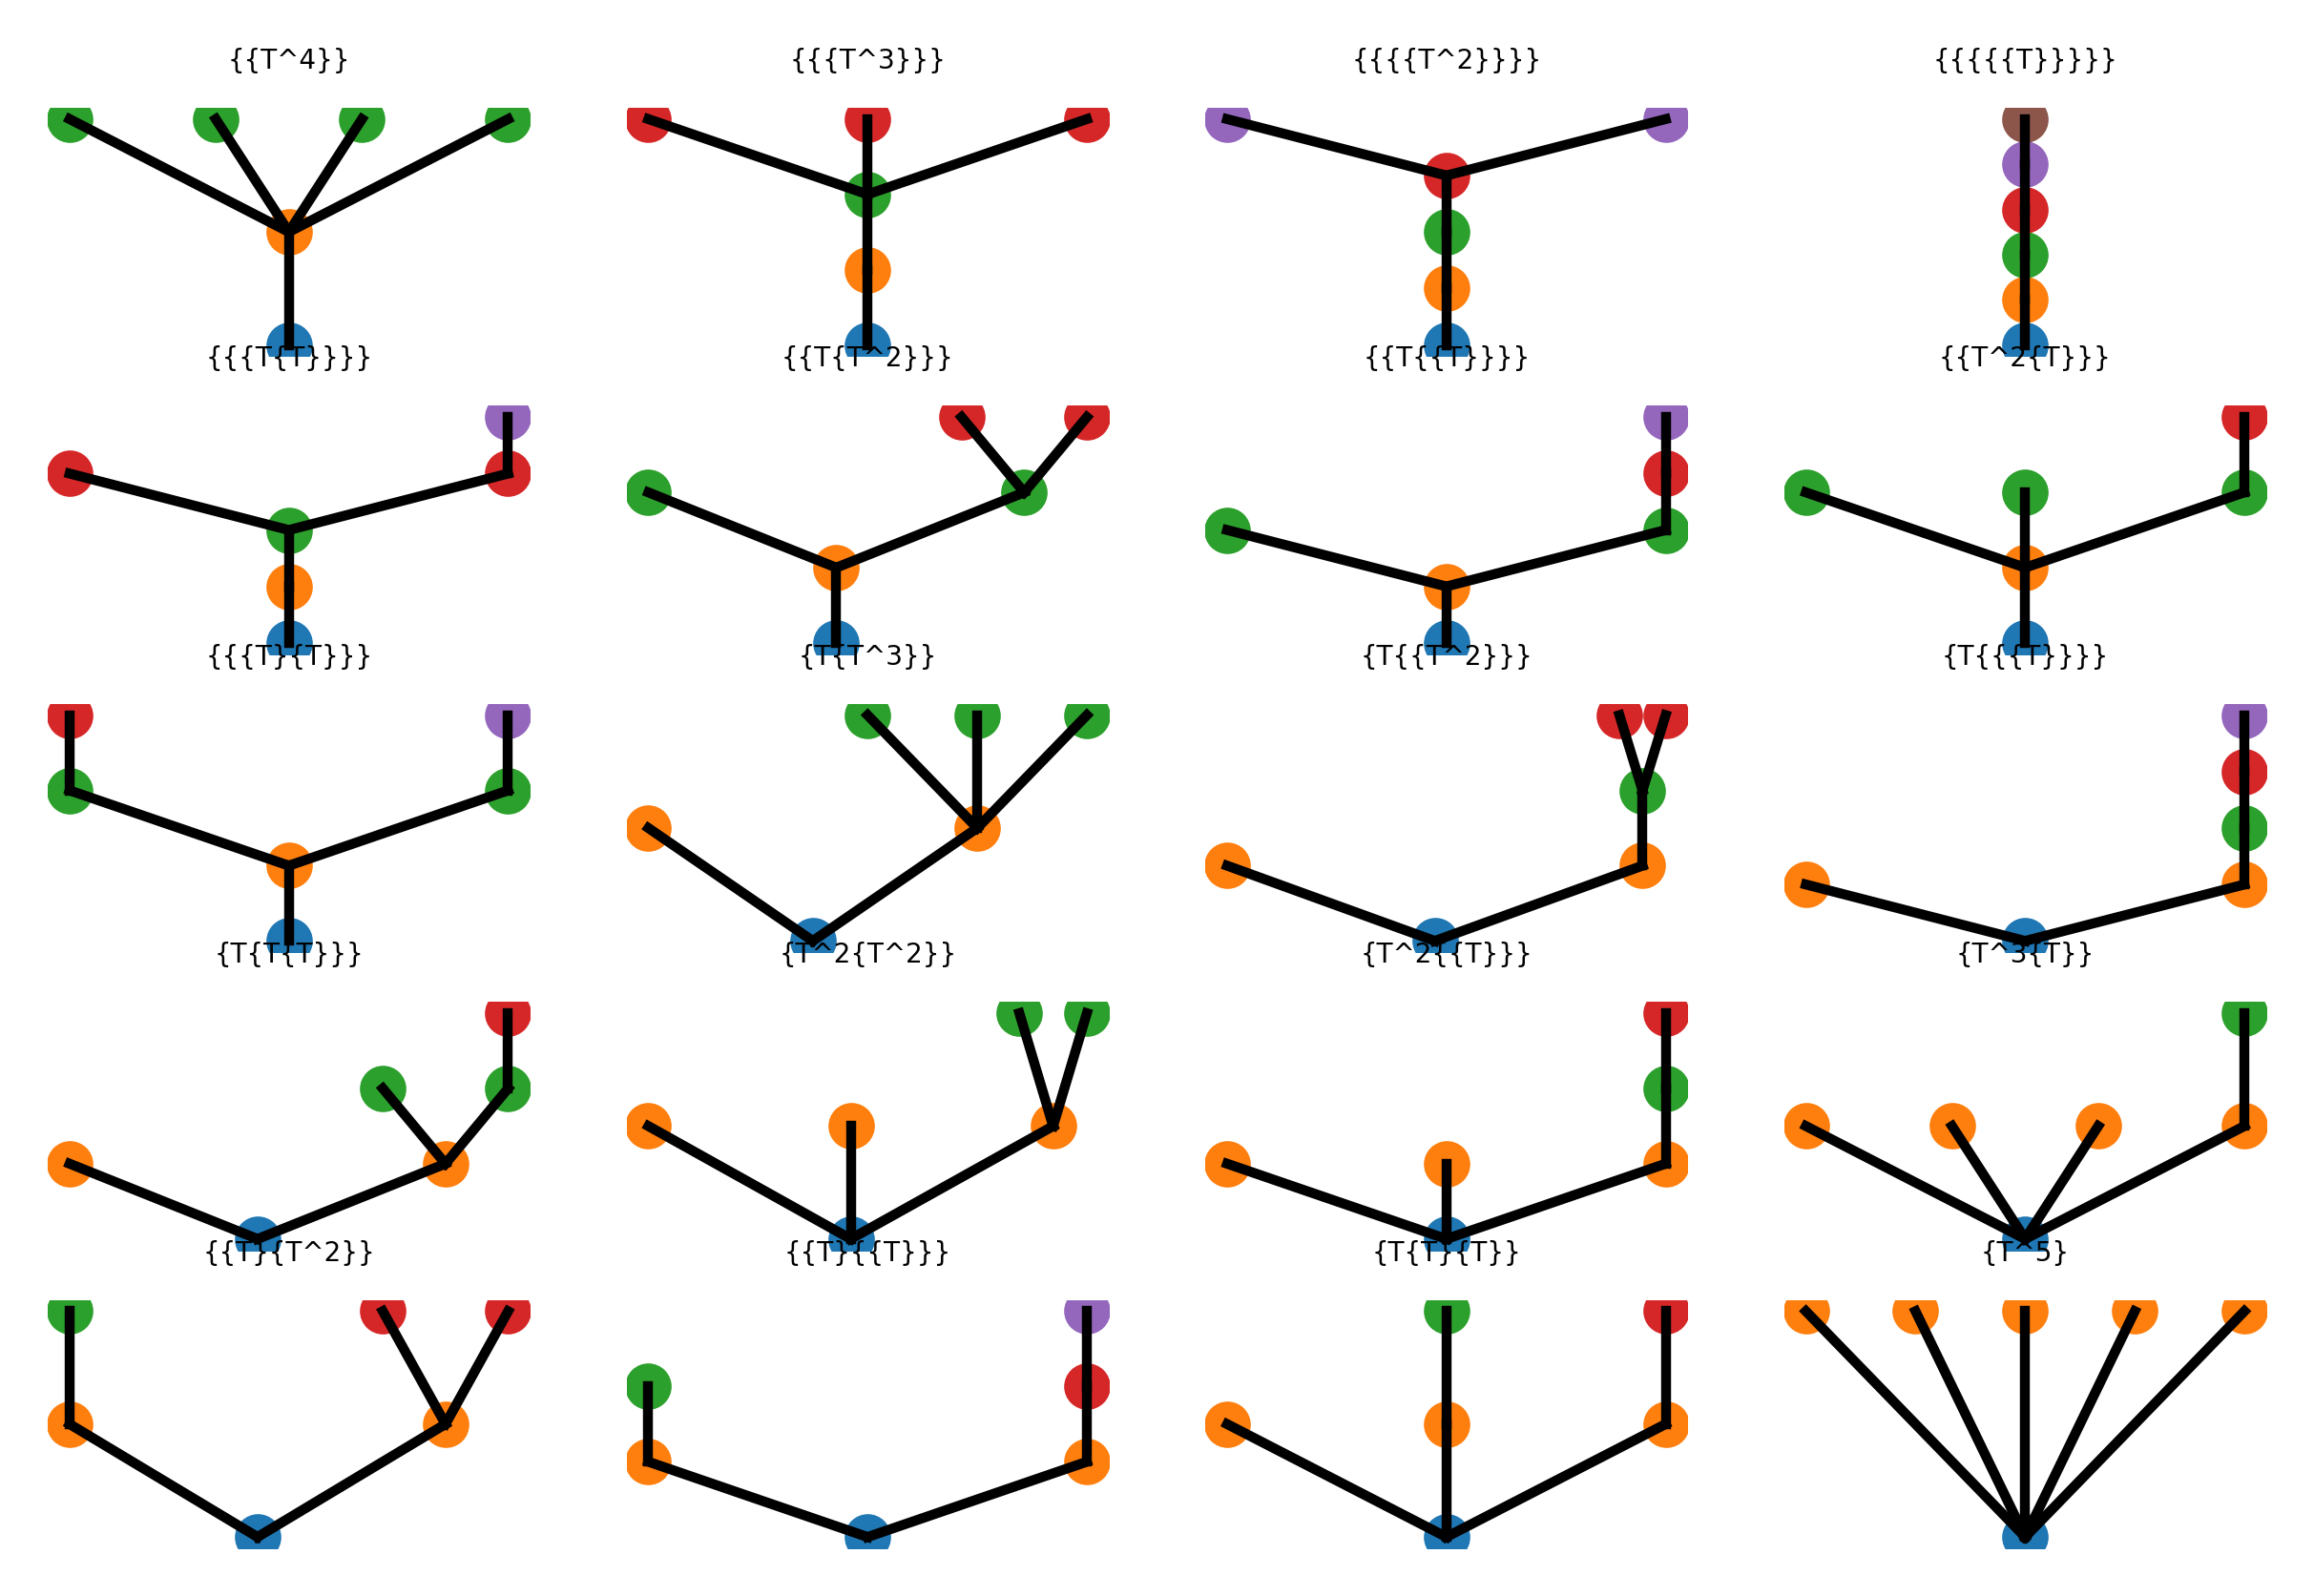

In [8]:
import nodepy.rooted_trees as rt
import matplotlib.pyplot as plt

fig = rt.plot_all_trees(6)

plt.setp(fig,dpi=500)
plt.draw()

## Practical comparison of Runge-Kutta methods

NodePy includes some convenient functions for running a set of time-stepping methods on a set of initial-value problems.

### Convergence test

This function runs each method with a range of fixed step sizes and plots the error versus the number of derivative evaluations.  This is a commonly-used metric for deciding which method is most efficient.

solving with Classical RK4
solving with SSPRK 22


solving with SSPRK(10,4)


(array([ 200,  400,  800, 1600, 3200, 6400]),
 [[0.01962406438809694,
   0.0013605924601165498,
   8.957328302017231e-05,
   5.745868975282065e-06,
   3.6382047596816847e-07,
   2.2886979422764853e-08],
  [6.285838747911612,
   1.7499094663042172,
   0.46031975908701384,
   0.11793667006938335,
   0.02984010106845858,
   0.007504401545389783],
  [0.0012334766857691193,
   8.043147519742888e-05,
   5.133742575935685e-06,
   3.242335537834151e-07,
   2.0370549691506312e-08,
   1.2763905488100136e-09]])

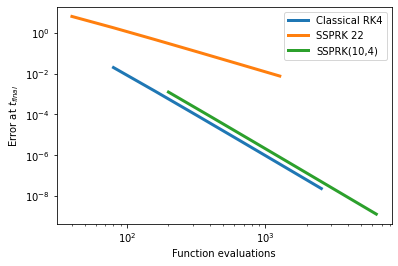

In [9]:
import nodepy.runge_kutta_method as rk
import nodepy.convergence as cv
from nodepy import ivp

#Load some methods:
rk4=rk.loadRKM('RK44')
SSP2=rk.loadRKM('SSP22')
SSP104=rk.loadRKM('SSP104')

#Define an IVP:
myivp = ivp.load_ivp('test')

cv.ctest([rk4,SSP2,SSP104], myivp, verbosity=1)

### Performance test

For methods with automatic step size control (such as embedded Runge-Kutta pairs), we can run each method with a range of prescribed error tolerances.

(array([[14244., 19976., 25907., 35182., 47235., 65131.],
        [15466., 22489., 29959., 40897., 55661., 78573.],
        [15972., 22230., 31248., 41022., 57066., 81666.]]),
 array([[5.62266160e-04, 5.06130715e-05, 3.88574848e-06, 3.27630837e-07,
         1.97563705e-08, 1.68623281e-09],
        [4.31211746e-04, 4.87740711e-05, 3.74033871e-06, 3.34847275e-07,
         3.98095071e-08, 3.79076886e-09],
        [4.74382487e-04, 5.28207408e-05, 3.54324243e-06, 4.93797970e-07,
         6.33271104e-08, 5.70138963e-09]]))

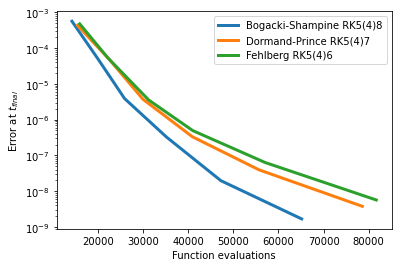

In [10]:
"""Runs a performance test over the non-stiff DETEST suite of problems"""
from nodepy import *

bs5=rk.loadRKM('BS5')
f5=rk.loadRKM('Fehlberg45')
dp5=rk.loadRKM('DP5')
ivps=ivp.detest_suite()

tols=list(map(lambda x:10**-x,range(4,10)))

conv.ptest([bs5,dp5,f5],ivps,tols)